In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
save_name='indian_pines_all'
df = pd.read_csv(f'{save_name}.csv')
df.columns

Index(['band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'band8',
       'band9', 'band10',
       ...
       'band192', 'band193', 'band194', 'band195', 'band196', 'band197',
       'band198', 'band199', 'band200', 'class'],
      dtype='object', length=201)

In [3]:
df

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,2561,3987,4011,4023,4201,4377,4418,4248,4180,3838,...,1013,1012,1018,1015,1011,1001,1000,1009,1008,0
21021,2726,4104,4024,3880,4210,4377,4413,4174,4229,3900,...,1012,1014,1012,1024,998,1010,1006,1000,1000,0
21022,3153,3864,4282,3889,4310,4372,4375,4208,4096,3878,...,1016,1015,1016,1021,1008,1019,1003,1008,1000,0
21023,3155,4104,4106,4027,4139,4318,4413,4174,4140,3933,...,1005,1011,1008,1012,1014,1007,1011,1005,1003,0


In [4]:
class_labels = {'1':'Alfalfa',
                '2':'Corn-notill',
                '3':'Corn-mintill',
                '4':'Corn',
                '5':'Grass-pasture',
                '6':'Grass-trees',
                '7':'Grass-pasture-mowed',
                '8':'Hay-windrowed',
                '9':'Oats',
                '10':'Soybean-notill',
                '11':'Soybean-mintill',
                '12':'Soybean-clean',
                '13':'Wheat',
                '14':'Woods',
                '15':'Buildings-Grass-Trees-Drives',
                '16':'Stone-Steel-Towers',
               }

In [5]:
names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn', 'Grass-pasture', 'Grass-trees',
         'Grass-pasture-mowed', 'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
         'Soybean-clean', 'Wheat', 'Woods', 'Buildings Grass Trees Drives', 'Stone Steel Towers']

# 0.SVM
- 使用SVM在原始数据上进行分类。
- docs:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
def svm_matrix_plot(X, y):
    """
    使用SVM对数据进行分类，绘制结果，并统计分类精度、召回率和F1分数
    ----
    param X:数据样本集（不含标签），np.array
    param y:数据集标签，np.array
    """
    # 训练集测试集划分，比例8:2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)
    # 实例化分类器，核函数：径向基函数（高斯核）
    svm = SVC(C=100, kernel='rbf', cache_size=10*1024)
    # 训练分类器
    svm.fit(X_train, y_train)
    # 测试集的预测结果
    ypred = svm.predict(X_test)
    
    # 分类结果的混淆矩阵
    conf_matrix = confusion_matrix(y_test, ypred)
    df_cm = pd.DataFrame(conf_matrix, columns=np.unique(names), index = np.unique(names))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,8))
    sns.set(font_scale = 1.4)#for label size
    sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
    
    return svm, y_test, ypred

In [12]:
def plot_classify(svm, q, save_name='IP_cmap'):
    """
    绘制分类结果
    ----
    param svm：训练好的svm分类器
    param q：数据集，DataFrame
    """
    l=[]
    for i in range(q.shape[0]):
        if q.iloc[i, -1] == 0:
            l.append(0)
        else:
            l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

    clmap = np.array(l).reshape(145, 145).astype('float')
    plt.figure(figsize=(10, 8))
    plt.imshow(clmap, cmap='nipy_spectral')
    plt.colorbar()
    plt.axis('off')
    plt.savefig(f'./results/{save_name}.png')
    plt.show()

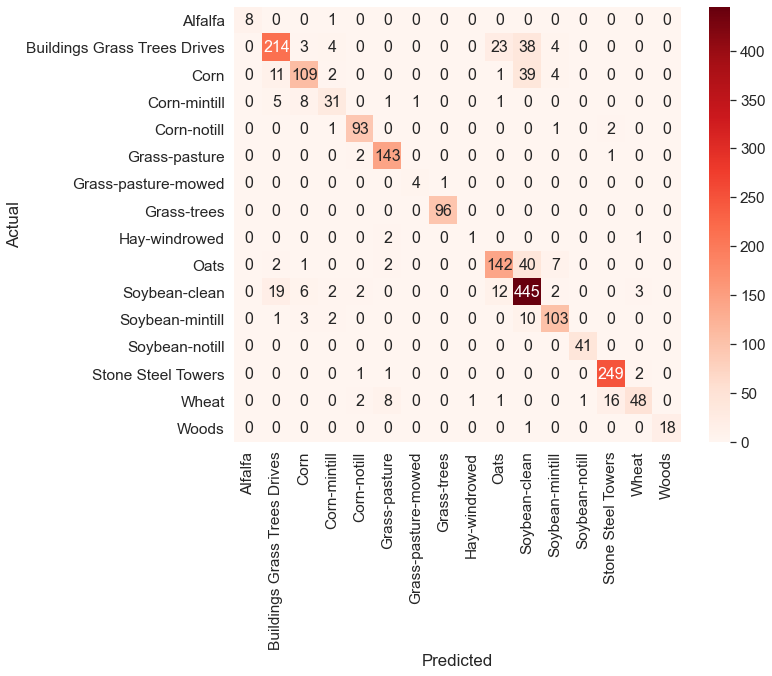

In [9]:
# 去除掉背景（0类）
x = df[df['class'] != 0]
X = x.iloc[:, :-1].values
y = x.iloc[:, -1].values

svm, y_test, ypred = svm_matrix_plot(X, y)

In [10]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.89      0.94         9
                 Corn-notill       0.85      0.75      0.80       286
                Corn-mintill       0.84      0.66      0.74       166
                        Corn       0.72      0.66      0.69        47
               Grass-pasture       0.93      0.96      0.94        97
                 Grass-trees       0.91      0.98      0.94       146
         Grass-pasture-mowed       0.80      0.80      0.80         5
               Hay-windrowed       0.99      1.00      0.99        96
                        Oats       0.50      0.25      0.33         4
              Soybean-notill       0.79      0.73      0.76       194
             Soybean-mintill       0.78      0.91      0.84       491
               Soybean-clean       0.85      0.87      0.86       119
                       Wheat       0.98      1.00      0.99        41
                   

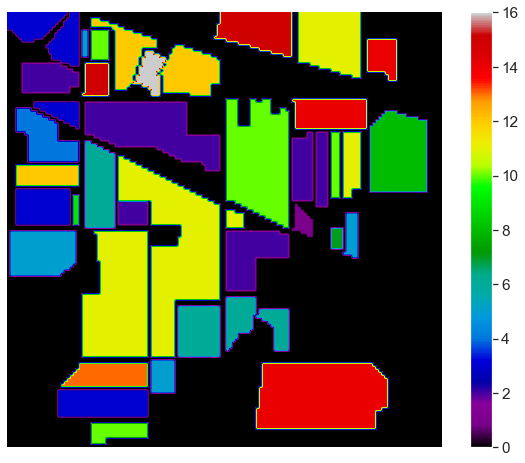

In [11]:
# 真实数据
y = pd.read_csv("df_indian_pines_gt.csv")

plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('./results/IP_cmap.png')
plt.show()

<ipython-input-12-c845a6e4195e>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  clmap = np.array(l).reshape(145, 145).astype('float')


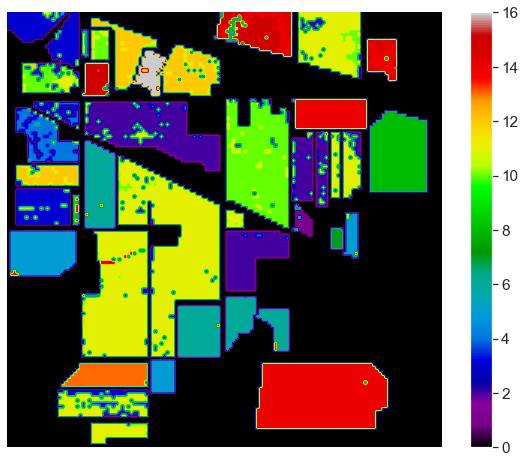

In [13]:
plot_classify(svm, df, save_name = 'IP_SVM_Orig')

# 1. PCA
- PCA:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- KPCA:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
- Spares PCA:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA

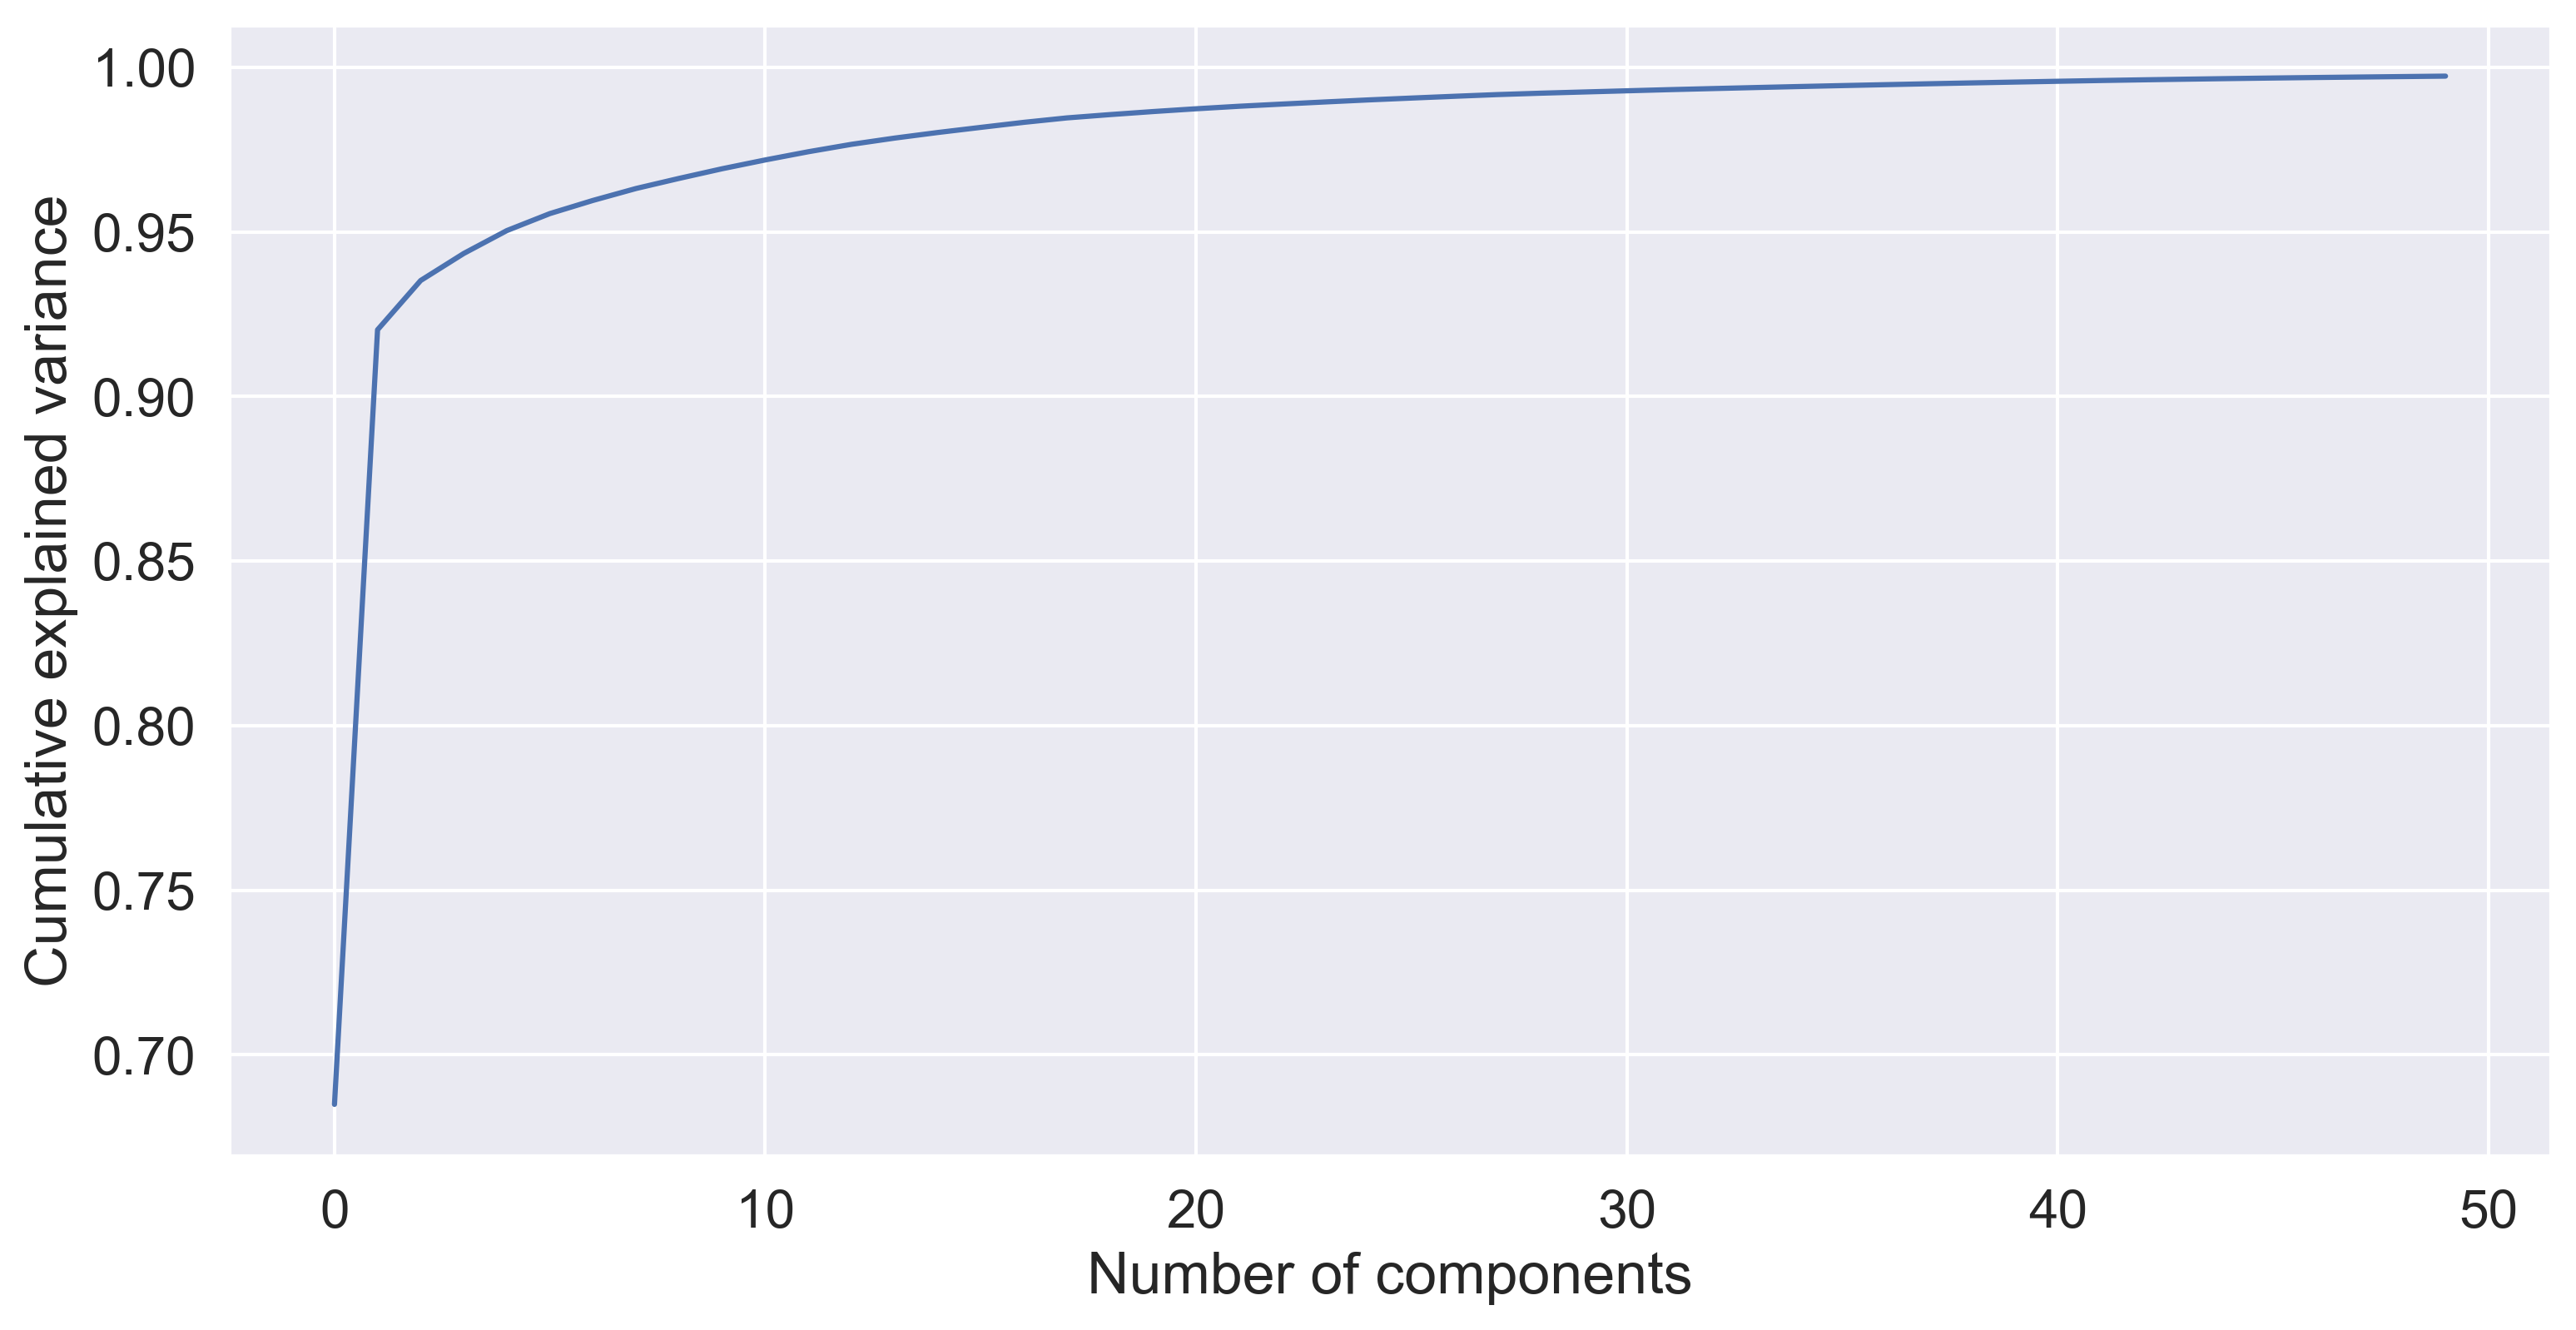

In [14]:
from sklearn.decomposition import PCA

pca_components = 50

pca = PCA(n_components = pca_components)
data = df.iloc[:, :-1].values
dt = pca.fit_transform(data)

ev = pca.explained_variance_ratio_

plt.figure(figsize=(12, 6), dpi=300)
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()

In [16]:
pca_components = 50

pca = PCA(n_components = pca_components)
pca_results = pca.fit_transform(df.iloc[:, :-1].values)

print(pca_results)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(df.iloc[:, -1])], axis = 1)

q.columns = [f'PC-{i}' for i in range(1, pca_components+1)]+['class']

q.head()

[[ 5.01490598e+03  1.45686326e+03  7.26970489e+01 ...  2.08293923e+01
   4.15345626e+01  6.85181174e+01]
 [ 5.60138374e+03 -2.02345009e+03  3.50134661e+02 ... -1.54757115e+01
   3.33018518e+01  6.80540768e+01]
 [ 5.79613544e+03 -3.09039485e+03  4.90539929e+02 ...  3.52865154e+01
   3.40058254e+01  6.17207353e+01]
 ...
 [-7.36983420e+03 -1.13238177e+03  3.98170226e+02 ...  2.85394906e+00
   1.11365489e+02  1.12551906e+01]
 [-6.49708724e+03  7.98240033e+02  6.76808968e+02 ... -4.95004037e+01
  -5.96234484e+01 -2.22560916e+01]
 [-6.57046116e+03  3.46749622e+02  4.65450797e+02 ...  1.97678434e+01
  -2.88228665e+01  4.94912728e+01]]


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-42,PC-43,PC-44,PC-45,PC-46,PC-47,PC-48,PC-49,PC-50,class
0,5014.905985,1456.863260,72.697049,71.204925,-435.686983,-68.840315,134.809882,-304.372432,256.433014,-66.631007,...,-8.229500,-67.082383,-96.026230,-24.344758,-49.427132,6.469552,12.526732,-15.251517,65.428089,3
1,5601.383743,-2023.450087,350.134661,-528.465053,148.088297,-288.359031,202.956873,240.848031,-474.857798,93.493718,...,8.881380,-14.361445,-47.152259,57.900296,-11.738194,0.421551,-26.364669,-16.491712,55.632182,3
2,5796.135442,-3090.394852,490.539929,-760.214346,259.933304,-131.611179,172.927305,205.911240,572.491934,-191.621984,...,-6.355925,11.110147,14.145433,136.559769,-26.328342,37.444952,32.582584,-13.769745,54.043082,3
3,5586.204575,-2369.376085,356.274719,-502.687154,146.554952,-306.679326,251.071091,234.966427,-314.023281,54.962267,...,-28.138150,-29.814413,-74.340657,5.907182,-42.705973,14.472105,-7.910888,-46.552530,19.522531,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495442,-438.266706,502.715434,-345.536574,-188.352772,-67.505996,...,-48.050720,-101.260069,-137.289564,-100.375818,-65.489268,15.264254,34.647432,-72.738094,6.573005,3


In [18]:
def plot_pca(q):
    fig = plt.figure(figsize = (20, 10))

    for i in range(1, 1+8):
        fig.add_subplot(2,4, i)
        plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
        plt.axis('off')
        plt.title(f'Band - {i}')

    plt.savefig('./results/IP_PCA_Bands.png')

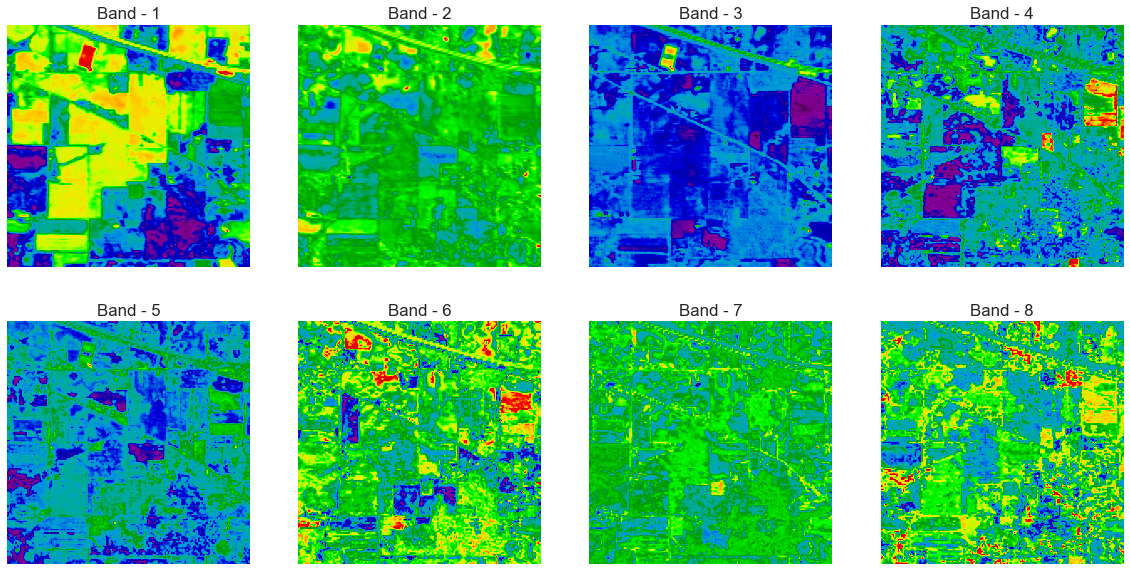

In [19]:
plot_pca(q)

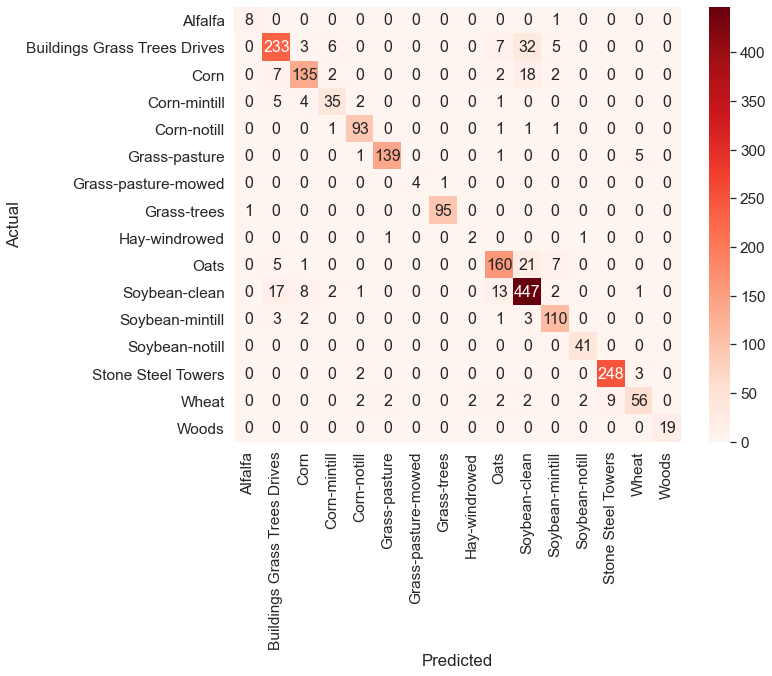

In [20]:
# 去除掉背景（0类）
x = q[q['class'] != 0]
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values

svm, y_test, ypred = svm_matrix_plot(X, y)

In [21]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       0.89      0.89      0.89         9
                 Corn-notill       0.86      0.81      0.84       286
                Corn-mintill       0.88      0.81      0.85       166
                        Corn       0.76      0.74      0.75        47
               Grass-pasture       0.92      0.96      0.94        97
                 Grass-trees       0.98      0.95      0.97       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      0.99      0.99        96
                        Oats       0.50      0.50      0.50         4
              Soybean-notill       0.85      0.82      0.84       194
             Soybean-mintill       0.85      0.91      0.88       491
               Soybean-clean       0.86      0.92      0.89       119
                       Wheat       0.93      1.00      0.96        41
                   

<ipython-input-12-c845a6e4195e>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  clmap = np.array(l).reshape(145, 145).astype('float')


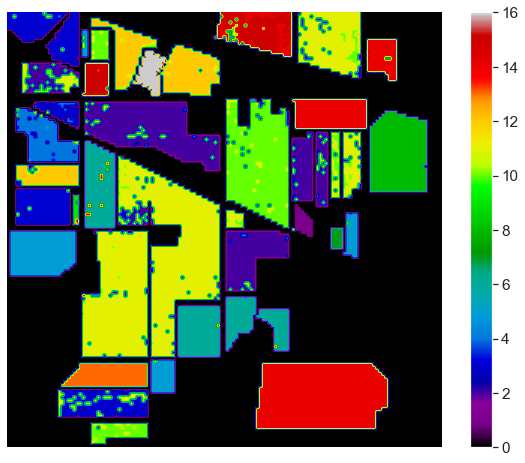

In [22]:
plot_classify(svm, q, save_name = 'IP_SVM_PCA')

# 2.KPCA

In [49]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

kpca_components = 50

transformer = KernelPCA(n_components=kpca_components,
                        kernel='rbf')

kpca_results = transformer.fit_transform(df.iloc[:, :-1].values)

q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(df.iloc[:, -1])], axis = 1)

q.columns = [f'PC-{i}' for i in range(1, pca_components+1)]+['class']

q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-42,PC-43,PC-44,PC-45,PC-46,PC-47,PC-48,PC-49,PC-50,class
0,5014.905985,1456.863260,72.697049,71.204926,-435.686985,-68.840319,134.809860,-304.372448,256.432986,-66.630986,...,-7.209228,-68.447484,-98.484705,-22.541646,-42.864132,4.964548,26.836566,16.382149,79.119531,3
1,5601.383743,-2023.450087,350.134661,-528.465052,148.088297,-288.359034,202.956852,240.848022,-474.857882,93.493786,...,8.480995,-15.200503,-47.745547,55.809230,-9.511512,-0.918734,-10.874211,16.093200,75.073085,3
2,5796.135442,-3090.394852,490.539929,-760.214346,259.933302,-131.611179,172.927302,205.911240,572.491962,-191.622017,...,-6.111292,11.519021,12.801992,140.061798,-25.014664,38.150439,36.922279,11.674729,61.655931,3
3,5586.204575,-2369.376085,356.274719,-502.687155,146.554951,-306.679324,251.071094,234.966434,-314.023250,54.962250,...,-28.189507,-29.288557,-74.318764,8.245603,-42.847131,13.831425,-5.114863,-27.161074,46.090233,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495444,-438.266706,502.715433,-345.536581,-188.352727,-67.506070,...,-46.964994,-101.407220,-141.038590,-96.788077,-64.876288,16.354894,27.710290,-73.254395,32.122211,3


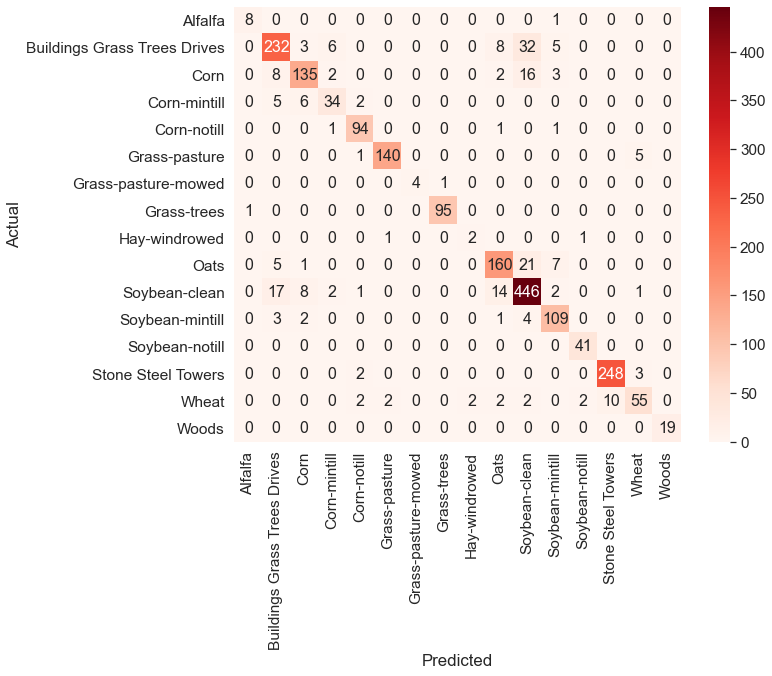

In [50]:
# 去除掉背景（0类）
x = q[q['class'] != 0]
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values

svm, y_test, ypred = svm_matrix_plot(X, y)

In [51]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       0.89      0.89      0.89         9
                 Corn-notill       0.86      0.81      0.83       286
                Corn-mintill       0.87      0.81      0.84       166
                        Corn       0.76      0.72      0.74        47
               Grass-pasture       0.92      0.97      0.94        97
                 Grass-trees       0.98      0.96      0.97       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      0.99      0.99        96
                        Oats       0.50      0.50      0.50         4
              Soybean-notill       0.85      0.82      0.84       194
             Soybean-mintill       0.86      0.91      0.88       491
               Soybean-clean       0.85      0.92      0.88       119
                       Wheat       0.93      1.00      0.96        41
                   

<ipython-input-33-75759e51a2c9>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  clmap = np.array(l).reshape(145, 145).astype('float')


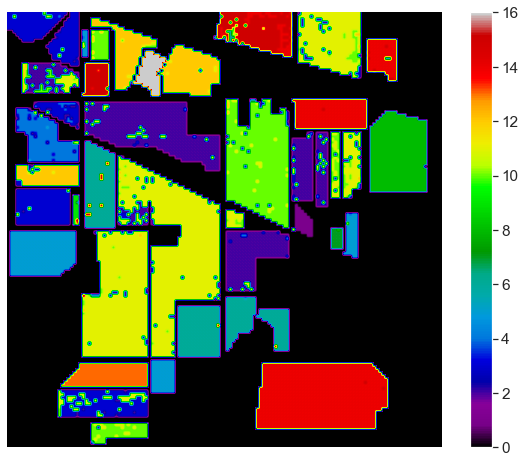

In [52]:
plot_classify(svm, q, save_name = 'IP_SVM_KPCA')